In [ ]:
#Question 2b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

In [2]:
path = r"C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets"

In [3]:
df = []
years = range(1995, 2005)

In [4]:
for year in years: 
    filename = f"{year}.csv" 
    file_path = os.path.join(os.getcwd(), path, filename) 
     
    print(file_path) 
     
    if os.path.isfile(file_path): 
        df.append(pd.read_csv(file_path, encoding='latin-1', low_memory = True)) 
df = pd.concat(df, ignore_index=True)

C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1995.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1996.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1997.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1998.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\1999.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2000.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2001.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2002.csv
C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2003.csv


C:\Users\ASUS UX534F\AppData\Local\Temp\ipykernel_17292\514506071.py:8: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df.append(pd.read_csv(file_path, encoding='latin-1', low_memory = True))


C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\2004.csv


In [5]:
planedata_df = pd.read_csv(r"C:\Users\ASUS UX534F\Desktop\SIM\y2\ST2195\Coursework\Datasets\plane-data.csv")

In [6]:
print(planedata_df['year'].dtype)
print(planedata_df['year'].unique())

object
[nan '2004' '1998' '1986' '1999' '2002' '1994' '2003' '2005' '2006' '2000'
 '2001' '1997' '1995' '1996' '1987' '1985' 'None' '1988' '1968' '1990'
 '1991' '1969' '1970' '1992' '1993' '1965' '1989' '1959' '1980' '2008'
 '1983' '0000' '1984' '2007' '1967' '1975' '1979' '1957' '1974' '1978'
 '1963' '1956' '1972' '1962' '1973' '1982' '1976' '1964' '1977' '1946'
 '1966' '1971']


In [7]:
print(planedata_df[planedata_df['year'] == 0])
planedata_df['year'] = pd.to_numeric(planedata_df['year'], errors='coerce')
planedata_df.dropna(subset=['year'], inplace=True)
print(planedata_df['year'].unique())

Empty DataFrame
Columns: [tailnum, type, manufacturer, issue_date, model, status, aircraft_type, engine_type, year]
Index: []
[2004. 1998. 1986. 1999. 2002. 1994. 2003. 2005. 2006. 2000. 2001. 1997.
 1995. 1996. 1987. 1985. 1988. 1968. 1990. 1991. 1969. 1970. 1992. 1993.
 1965. 1989. 1959. 1980. 2008. 1983.    0. 1984. 2007. 1967. 1975. 1979.
 1957. 1974. 1978. 1963. 1956. 1972. 1962. 1973. 1982. 1976. 1964. 1977.
 1946. 1966. 1971.]


In [8]:
planedata_df = planedata_df[planedata_df['year'] != 0]
print(planedata_df['year'].unique())

[2004. 1998. 1986. 1999. 2002. 1994. 2003. 2005. 2006. 2000. 2001. 1997.
 1995. 1996. 1987. 1985. 1988. 1968. 1990. 1991. 1969. 1970. 1992. 1993.
 1965. 1989. 1959. 1980. 2008. 1983. 1984. 2007. 1967. 1975. 1979. 1957.
 1974. 1978. 1963. 1956. 1972. 1962. 1973. 1982. 1976. 1964. 1977. 1946.
 1966. 1971.]


In [9]:
df["average_delay"] = (df['ArrDelay'] + df['DepDelay'])/2

In [10]:
df_b = pd.merge(df[["TailNum", "average_delay"]], planedata_df[["tailnum", "year"]], left_on="TailNum", right_on="tailnum")

In [11]:
def int_year(x):
    try:
        return int(x)
    except:
        return None

df_b['year'] = df_b["year"].apply(int_year)

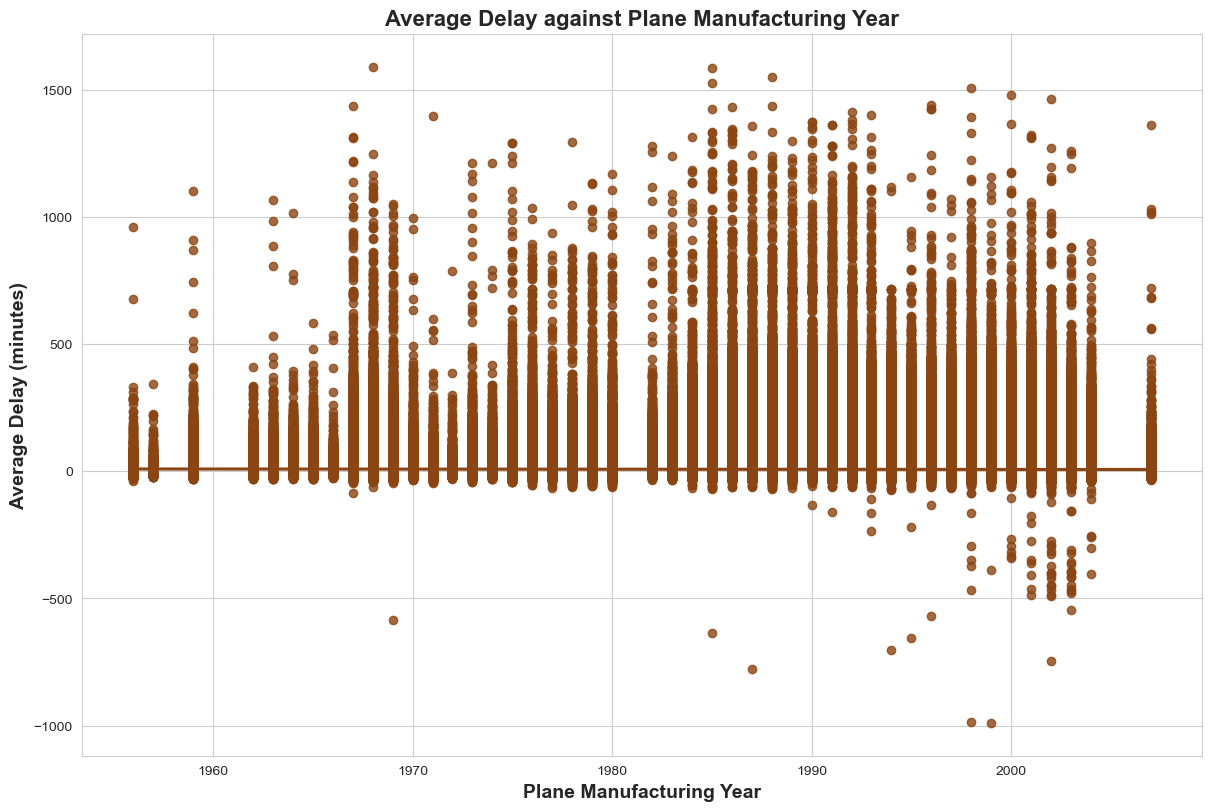

In [12]:
sns.set_style("whitegrid")
fig4, ax4 = plt.subplots(figsize=(12, 8), constrained_layout=True)
ax4 = sns.regplot(x="year", y= "average_delay", data=df_b, ci=None, color='saddlebrown')
ax4.set_title("Average Delay against Plane Manufacturing Year", fontdict={"weight": "bold", "fontsize": 16})
ax4.set_xlabel("Plane Manufacturing Year", fontdict={"weight": "bold", "fontsize": 14})
ax4.set_ylabel("Average Delay (minutes)", fontdict={"weight": "bold", "fontsize": 14})
pass

In [13]:
print(tabulate(df_b.groupby('year')['average_delay'].mean().reset_index(), headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════╤═════════════════╕
│   year │   average_delay │
╞════════╪═════════════════╡
│   1956 │         8.30874 │
├────────┼─────────────────┤
│   1957 │         3.33973 │
├────────┼─────────────────┤
│   1959 │         6.09148 │
├────────┼─────────────────┤
│   1962 │         6.09828 │
├────────┼─────────────────┤
│   1963 │         6.50036 │
├────────┼─────────────────┤
│   1964 │         6.50962 │
├────────┼─────────────────┤
│   1965 │         4.09216 │
├────────┼─────────────────┤
│   1966 │         7.66761 │
├────────┼─────────────────┤
│   1967 │         4.91252 │
├────────┼─────────────────┤
│   1968 │         5.19571 │
├────────┼─────────────────┤
│   1969 │         4.62054 │
├────────┼─────────────────┤
│   1970 │         4.47843 │
├────────┼─────────────────┤
│   1971 │         3.28762 │
├────────┼─────────────────┤
│   1972 │         7.89526 │
├────────┼─────────────────┤
│   1973 │         4.83987 │
├────────┼─────────────────┤
│   1974 │         5.96586 │
├────────┼────